In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
from mpl_sizes import get_format

formatter = get_format("NeurIPS") # options: ICLR, ICML, NeurIPS, InfThesis

In [3]:
env2params = {

    'Hyperbolic Temporal Discount': 2, 
    
    "Death Process": 2,
    
    "IRT": 3,
    
    "Survival": 2,
    
    "Peregrines": 4,
    
    "Lotka Volterra": 4, 
    
    "Location Finding": 2, 
    
    "Morals": 9,
    
    "Emotion": 5,
    
    "Dugongs": 3,
}

env2inputs = {

    'Hyperbolic Temporal Discount': 3, 
    
    "Death Process": 1,
    
    "IRT": 2,
    
    "Survival": 1,
    
    "Peregrines": 1,
    
    "Lotka Volterra": 1, 
    
    "Location Finding": 2, 
    
    "Morals": 9,
    
    "Emotion": 5,
    
    "Dugongs": 1,
}

In [4]:
df = pd.read_csv("oed.csv")

df["Mean Error @ 10"] = df["Mean Error @ 10"].values.astype(float)
df["Mean Error @ 0"] = df["Mean Error @ 0"].values.astype(float)

In [5]:
df['Error difference'] =  df["Mean Error @ 0"] - df["Mean Error @ 10"]

In [6]:
df['num_params'] = df['Environment'].apply(lambda x: env2params[x])

In [8]:
df.loc[df['Environment'] == 'Dugongs', 'Environment'] = 'Animal Growths'
df.loc[df['Environment'] == 'Peregrines', 'Environment'] = 'Population Counts'

In [9]:
def plot_bar(x_list, means1, ci1, label1, means2, ci2, label2, xlabel, ylabel, title, save_path, ylims, width=0.25):
    """_summary_

    Args:
        x_list (_type_): list of x-axis values
        means1 (_type_): list of means for the first set of data
        ci1 (_type_): list of confidence intervals for the first set of data
        label1 (_type_): label for the first set of data
        means2 (_type_): list of means for the second set of data
        ci2 (_type_): list of confidence intervals for the second set of data
        label2 (_type_): label for the second set of data
        xlabel (_type_): label for the x-axis
        ylabel (_type_): label for the y-axis
        title (_type_): title of the plot
        save_path (_type_): path to save the plot
        ylims (_type_): y-axis limits
        width (_type_): width of the bars
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = sns.color_palette("colorblind")
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.yaxis.grid(False)
    ax.grid(axis='y', color='gray', alpha=0.2, linestyle='-')
    ax.tick_params(axis='y', which='both', length=0)
    ax.tick_params(axis='x', which='both', length=0)
    
    ax.set_ylim(ylims)

    x = np.arange(len(x_list))
    if means2 is not None:
        # Plot first set of data
        ax.bar(x - width/2, means1, width, yerr=ci1, label=label1, color=colors[0])

        # Plot second set of data
        ax.bar(x + width/2, means2, width, yerr=ci2, label=label2, color=colors[1])
    else:
        # Plot first set of data
        ax.bar(x, means1, width, yerr=ci1, label=label1, color=colors[0])

    # Customize the grid, legend, and labels
    ax.grid(True, which='major', axis='y', linestyle='-', linewidth=0.5, color='lightgrey')
    ax.grid(False, axis='x')
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, fontsize=16)

    # Customize the legend
    if means2 is not None:
        legend = ax.legend(loc='upper left', frameon=True, framealpha=0.9, fontsize=12)
        frame = legend.get_frame()
        frame.set_color('white')

    # add env names to the plot at x-ticks
    ax.set_xticks(x)
    ax.set_xticklabels(x_list)

    # save the plot
    plt.savefig(save_path, bbox_inches='tight')

## reasoning vs non reasoning

In [38]:
open_source_only = df[df['Model'] != '4o']


open_source_only['Reasoning'] = open_source_only['Model'].apply(lambda x: 'Thinker' in x)

filter_cond = (open_source_only["Reasoning"] == True)
grouped_data_reasoning = open_source_only[filter_cond].groupby("Environment")['Mean Error @ 10']
means_reasoning = grouped_data_reasoning.mean()
count_reasoning = grouped_data_reasoning.count()
ci_reasoning  = open_source_only[filter_cond].groupby("Environment")['StdDev @ 10'].mean() / np.sqrt(count_reasoning * 5)
x_labels = means_reasoning.index
print(means_reasoning)
print("\n")

filter_cond = (open_source_only["Reasoning"] == False)
grouped_data_non_reasoning = open_source_only[filter_cond].groupby("Environment")['Mean Error @ 10']
means_non_reasoning = grouped_data_non_reasoning.mean()
count_non_reasoning = grouped_data_non_reasoning.count()
ci_non_reasoning  = open_source_only[filter_cond].groupby("Environment")['StdDev @ 10'].mean() / np.sqrt(count_non_reasoning * 5)
x_labels = means_non_reasoning.index
print(means_non_reasoning)

Environment
Animal Growths                 -8.004848e-02
Death Process                  -5.184504e-01
Emotion                         1.704624e+00
Hyperbolic Temporal Discount    9.360727e-01
IRT                             1.734723e-18
Location Finding                2.050089e+00
Lotka Volterra                 -2.977377e-01
Morals                          6.236256e-01
Population Counts              -1.010912e-01
Survival                        4.084472e-01
Name: Mean Error @ 10, dtype: float64


Environment
Animal Growths                 -0.077833
Death Process                  -0.947883
Emotion                         1.425400
Hyperbolic Temporal Discount    0.907650
IRT                            -0.026667
Location Finding                4.066611
Lotka Volterra                 -0.253100
Morals                          0.522467
Population Counts              -0.315983
Survival                        0.317317
Name: Mean Error @ 10, dtype: float64


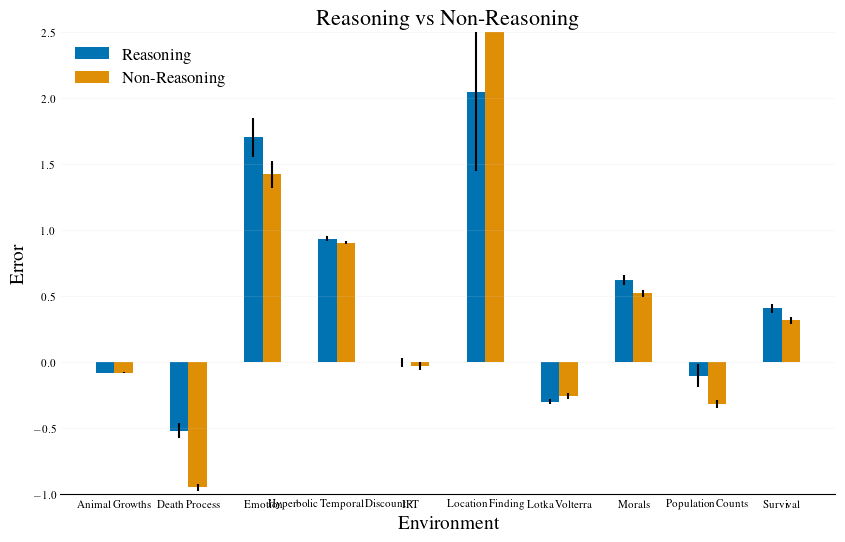

In [36]:
plot_bar(
    x_labels, 
    means_reasoning, 
    ci_reasoning,
    "Reasoning", 
    means_non_reasoning,
    ci_non_reasoning, 
    "Non-Reasoning", 
    "Environment", 
    "Error", 
    "Reasoning vs Non-Reasoning",
    "environment_difficulty_comparison.png", 
    (-1.0, 2.5), width=0.25)

## 7 vs 32b

In [20]:
open_source_only = df[df['Model'] != '4o']

open_thinker = open_source_only[open_source_only['Model'].apply(lambda x: 'OpenThinker' in x)]

filter_cond = (open_thinker["Model"] == "OpenThinker 32b")

grouped_data_big = open_thinker[filter_cond].groupby("Environment")['Mean Error @ 10']
means_big = grouped_data_big.mean()
count_big = grouped_data_big.count()
ci_big  = open_thinker[filter_cond].groupby("Environment")['StdDev @ 10'].mean() / np.sqrt(count_big * 5)
x_labels = means_big.index
print(means_big)
print("\n")

filter_cond = (open_thinker["Model"] == "OpenThinker-7b")
grouped_data_small = open_thinker[filter_cond].groupby("Environment")['Mean Error @ 10']
means_small = grouped_data_small.mean()
count_small = grouped_data_small.count()
ci_small  = open_thinker[filter_cond].groupby("Environment")['StdDev @ 10'].mean() / np.sqrt(count_small * 5)
x_labels = means_small.index
print(means_small)

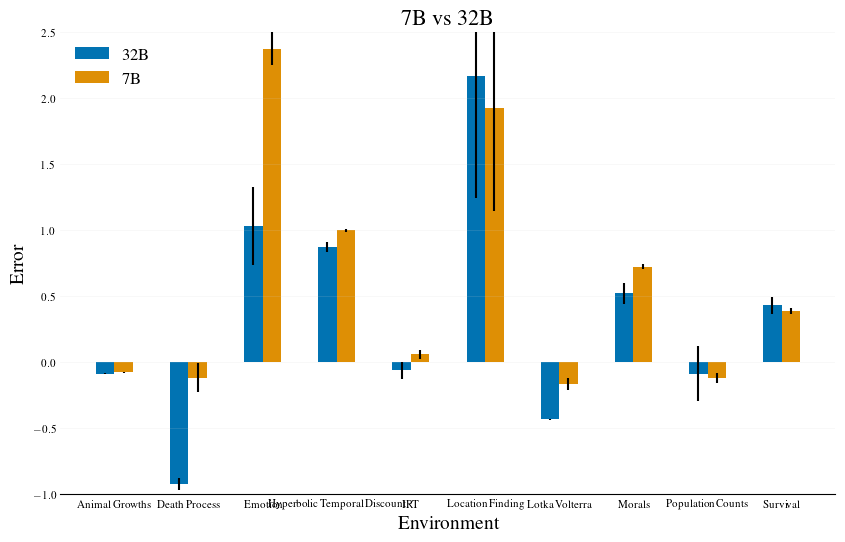

In [19]:
plot_bar(
    x_labels, 
    means_big, 
    ci_big,
    "32B", 
    means_small,
    ci_small, 
    "7B", 
    "Environment", 
    "Error", 
    "7B vs 32B",
    "environment_difficulty_comparison.png", 
    (-1.0, 2.5), width=0.25)

## bigger models == better

In [ ]:
filter_cond = (df['Condition'] == "Prior") & (df['Environment']!="Morals") & (df['Environment']!="Emotions") & (df['Environment'] != 'Location Finding')

grouped_data = df[filter_cond].groupby("Model")['Mean Error @ 10']

means_prior = grouped_data.mean()
ci_prior = df[filter_cond].groupby("Model")['StdDev @ 10'].mean() / np.sqrt(35)

filter_cond = (df['Condition'] != "Prior") & (df['Environment'] != 'Location Finding')

grouped_data = df[filter_cond].groupby("Model")['Mean Error @ 10']
means_no_prior = grouped_data.mean()
ci_no_prior = df[df[filter_cond] != "Prior"].groupby("Model")['StdDev @ 10'].mean() / np.sqrt(40)

x_labels = means_prior.index

print(means_prior)
print("\n")
print(means_no_prior)

In [ ]:
plot_bar(
    x_labels, 
    means_prior, 
    ci_prior,
    "Prior", 
    means_no_prior,
    ci_no_prior, 
    "No Prior", 
    "Environment", 
    "Error", 
    "prior vs no prior",
    "environment_difficulty_comparison.png", 
    (-0.5, 1.5), width=0.25)
# make it 32b and 7b

## which environments are harder

In [ ]:
groupby_key = "Environment"
grouped_data = df.groupby(groupby_key)['Mean Error @ 10']
means = grouped_data.mean()
ci = df.groupby(groupby_key)['StdDev @ 10'].mean() / np.sqrt(90)

x_labels = means.index

In [ ]:
together = pd.concat([means, ci], axis=1)
together = together.sort_values(by='Mean Error @ 10')

In [ ]:
plot_bar(
    [val.replace(" ", "\n") for val in together.index.values], 
    together['Mean Error @ 10'], 
    together['StdDev @ 10'],
    "Environment Difficulty", 
    None, 
     None, 
    "", 
    "Environment Difficulties", 
    "Error", 
    "Environment",
    "environment_difficulty_comparison.png", 
    (-1.5, 1.5), width=0.25)

##  complexity vs performance

In [ ]:
df['num_inputs'] = df['Environment'].apply(lambda x: env2inputs[x])

In [ ]:
df['num_params'] = df['Environment'].apply(lambda x: env2params[x])

In [ ]:
res = df[df['Condition']=="Prior"].groupby("Environment")[['num_params', 'Error difference']].median()

In [ ]:
plt.scatter(res['num_params'], res['Error difference'])

In [ ]:
res = df[df['Condition']!="Prior"].groupby("Environment")[['num_params', 'Error difference']].mean()

a1 = res[~np.isnan(res['Error difference'])]['Error difference'].values
a2 = res[~np.isnan(res['Error difference'])]['num_params'].values

In [ ]:
scipy.stats.pearsonr(a1, a2)

In [ ]:
res = df[df['Condition']!="Prior"].groupby("Environment")[['num_inputs', 'Error difference']].mean()

In [ ]:
a1 = res[~np.isnan(res['Error difference'])]['Error difference'].values
a2 = res[~np.isnan(res['Error difference'])]['num_inputs'].values

In [ ]:
scipy.stats.pearsonr(a1, a2)